In [4]:
%load_ext autoreload
%autoreload 2
import sys
import platform
from pathlib import Path
from os import environ
if platform.system() == "Darwin": # Nat laptop
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/Projects_sandbox'])
else:
    if environ["HOSTNAME"] == "lnx00004": # Nat Linux computer
        sys.path.extend(['/data/GitHub/NeuroPy'])
        sys.path.extend(['/data/GitHub/Projects_sandbox'])
    
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy.utils.mathutil import min_max_scaler
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from copy import deepcopy
from tqdm import tqdm

from neuropy import plotting
from neuropy.analyses.placefields import Pf1D, Pf1Dsplit
from neuropy.analyses.oscillations import detect_theta_epochs
from neuropy.core.position import Position
from neuropy.core.epoch import Epoch
from neuropy.core.session import ProcessData
from neuropy.plotting.ratemaps import plot_ratemap
from neuropy.plotting.figure import Fig
from neuropy.utils.misc import flatten
from neuropy.io import BinarysignalIO

from Psilocybin.subjects import get_psi_dir

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Specify plotting parameters

In [2]:
animals = ["Finn", "Rey", "Rose", "Finn2"]

## Time slice before / after injection

In [55]:
# Load in session
dir_use = get_psi_dir("Finn2", "saline2")
sess = ProcessData(dir_use)
print(sess.eegfile)

duration: 11628.67 seconds 
duration: 3.23 hours 



In [56]:
# Load in session file
sess.injection = Epoch(epochs=None, file=sess.filePrefix.with_suffix(".injection.npy"))
sess.injection

2 epochs
Snippet: 
        start         stop label
0    0.00000    986.65718   PRE
1  986.65798  11628.67200  POST

In [57]:
# Get signal and slice into PRE and POST injection portions
signal = sess.eegfile.get_signal()

pre_start, pre_stop = sess.injection["PRE"].as_array()[0]
pre_signal = signal.time_slice(t_start=pre_start, t_stop=pre_stop)

post_start, post_stop = sess.injection["POST"].as_array()[0]
post_signal = signal.time_slice(t_start=post_start, t_stop=post_stop)

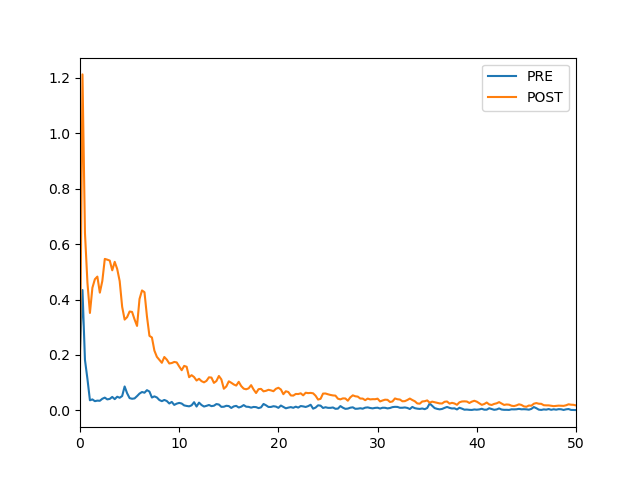

In [58]:
# Do your analysis - example below shows calculated power spectrum but could apply to SWR analyses as well.
%matplotlib widget
chan_use = 26

_, ax = plt.subplots()
for sig_use, name in zip([pre_signal, post_signal], ["PRE", "POST"]):
    trace = sig_use.traces[26]
    fs = sess.eegfile.sampling_rate
    f, pxx = sg.welch(trace, fs=fs, nperseg=4 * fs, noverlap=0)
    pxx = pxx * (0.95 * 1e-3) ** 2
    
    ax.plot(f, pxx, label=name)
    
ax.set_xlim([0, 50])
ax.legend()

## Select out only awake times
NRK currently working on!

In [76]:
from scipy.io import loadmat
states_file = sorted(sess.basepath.glob("*.SleepState.states.mat"))[0]

t = loadmat(states_file)
["SleepState"].item()


NameError: name 'squeeze' is not defined